<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [189]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [190]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [191]:
data = pd.read_csv("bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

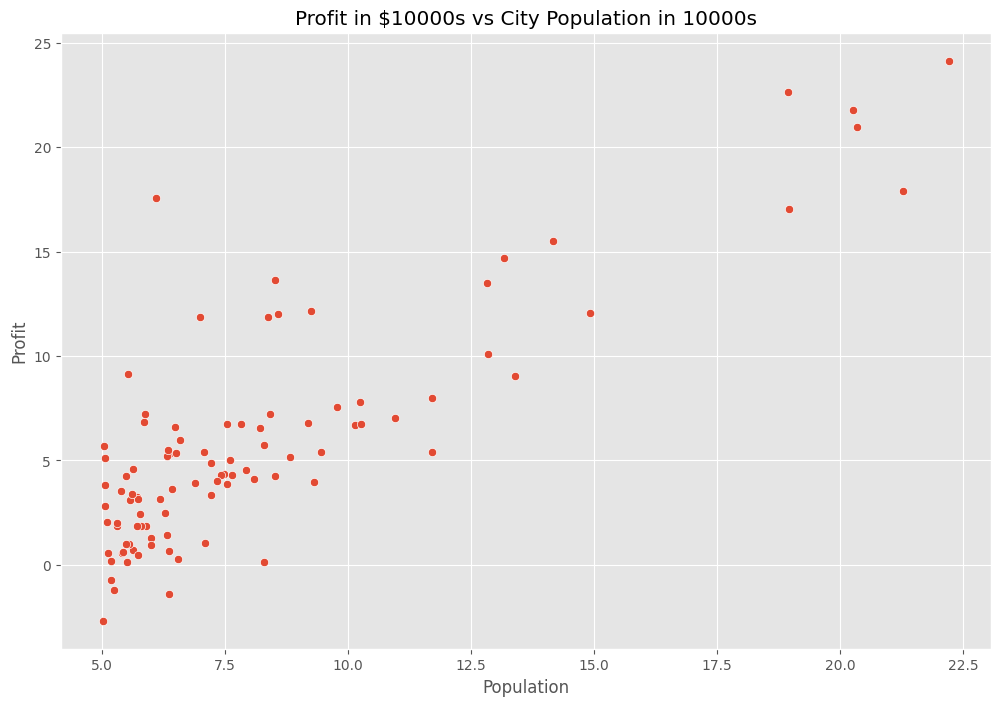

In [193]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City Population in 10000s')
plt.show()

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [194]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [195]:
m = data.Population.values.size
X = np.append(np.ones([m,1]), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros([2,1])
cost_function(X, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [196]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.T, (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    
    return theta, costs

In [197]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {} x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18 x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [198]:
from mpl_toolkits.mplot3d import Axes3D

In [199]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros([len(theta_0), len(theta_1)])

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        th = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, th)

Text(0.5, 0.92, 'Cost Function Surface')

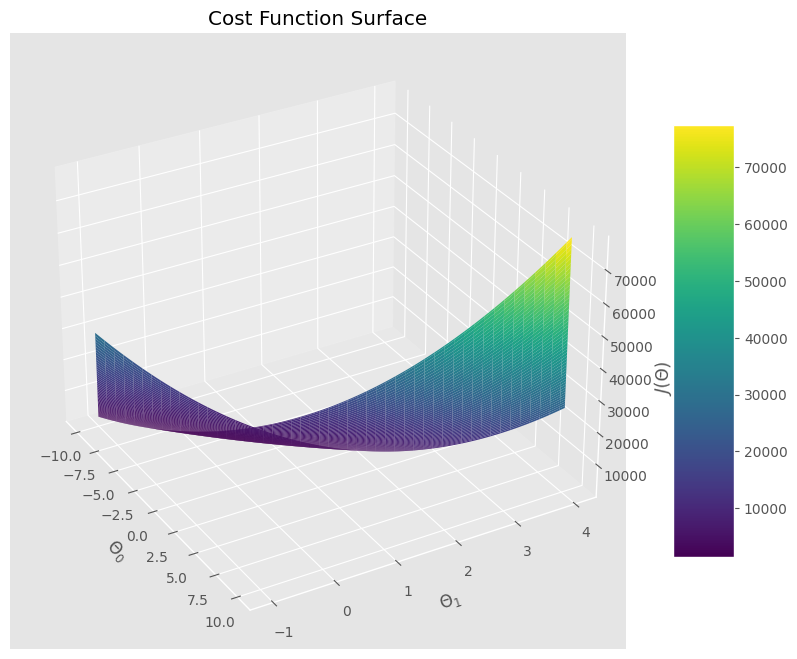

In [200]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.7, aspect=7)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)
plt.title('Cost Function Surface')

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

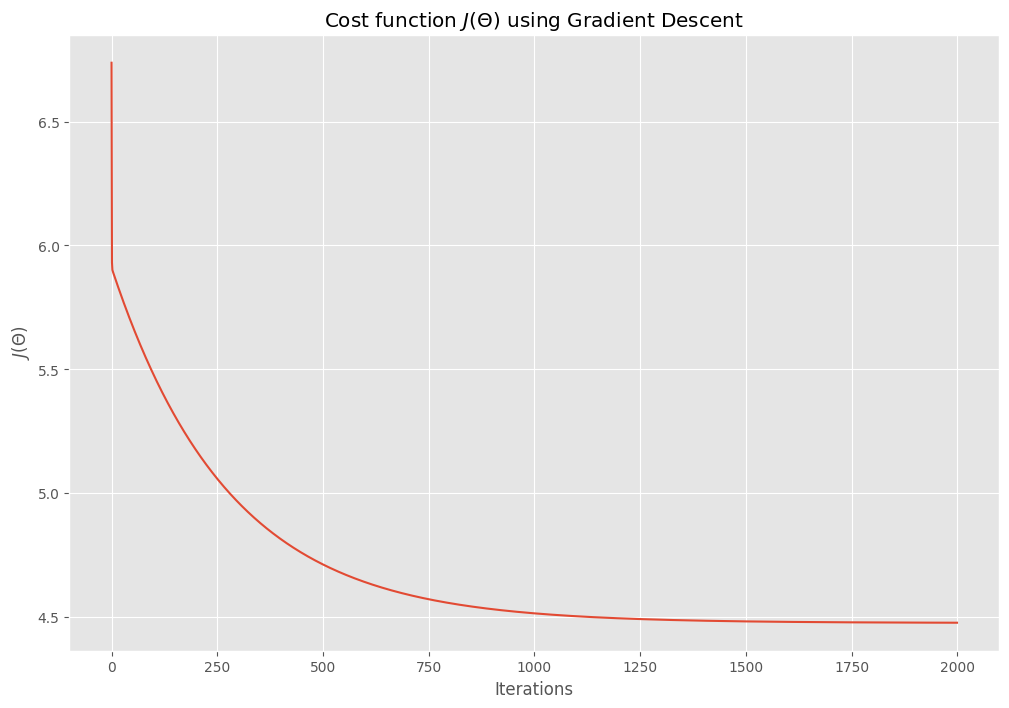

In [201]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function $J(\Theta)$ using Gradient Descent")
plt.show()

### Task 8: Training Data with Linear Regression Fit
---

In [202]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [203]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

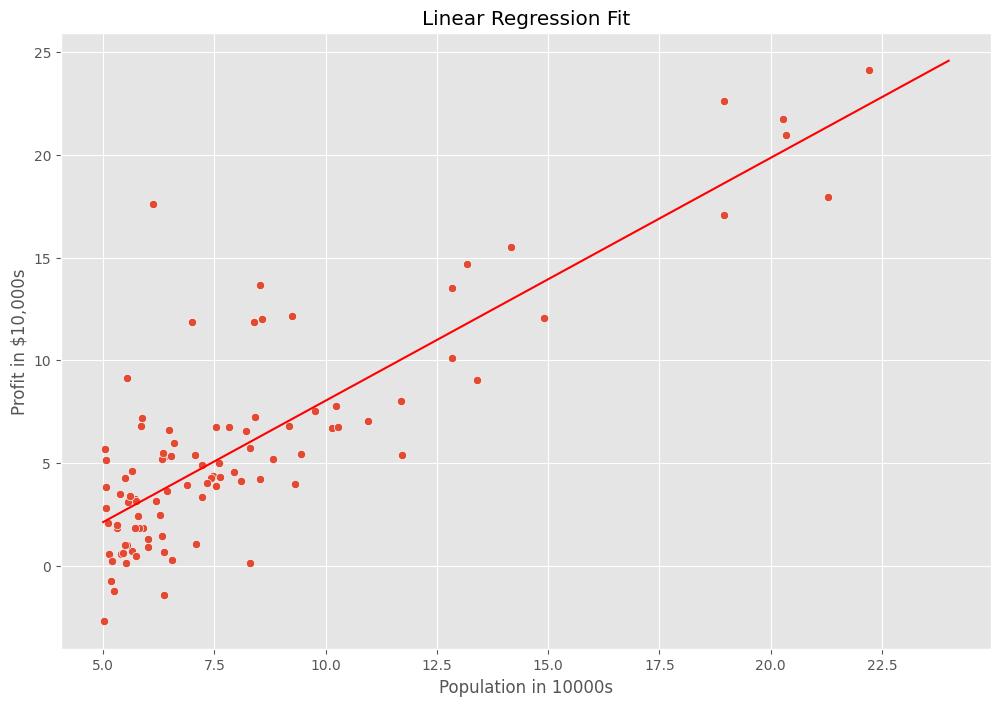

In [204]:
sns.scatterplot(x='Population', y='Profit', data=data)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
# data = np.vstack((x_value, y_value)).T
sns.lineplot(x=x_value, y=y_value, color='r')
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")
plt.show()

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [205]:
def predict(x, theta):
    y_pred = np.dot(theta.T, x)
    return y_pred

In [206]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))